In [1]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [15]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams.update({'font.size':18})

In [9]:
dt = 0.001
t = np.arange(0, 1, dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f_clean = f
f = f + 2.5*np.random.randn(len(t))

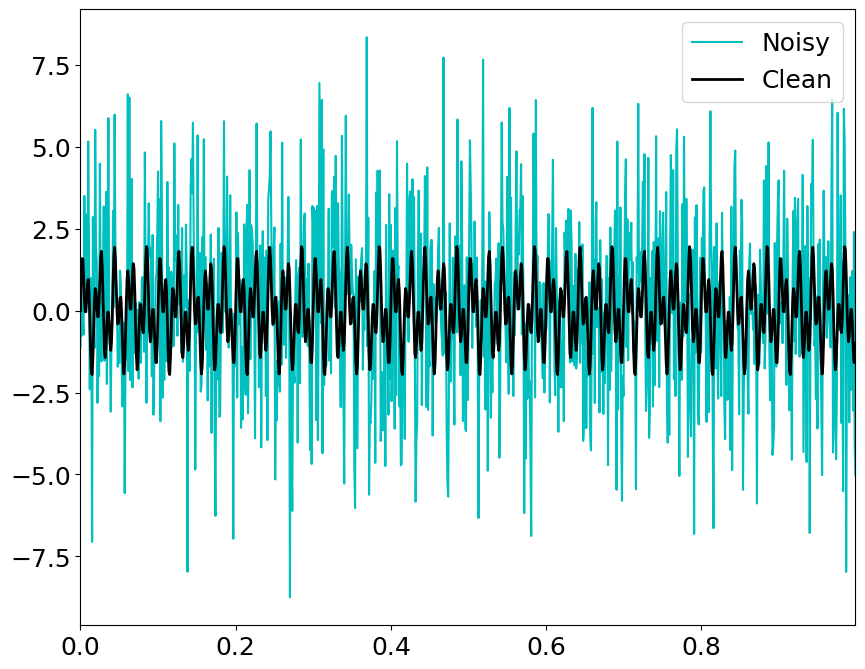

In [17]:
plt.plot(t, f, color = 'c', linewidth = 1.5, label = 'Noisy')
plt.plot(t, f_clean, color = 'k', linewidth = 2, label = 'Clean')
plt.xlim(t[0], t[-1])
plt.legend()

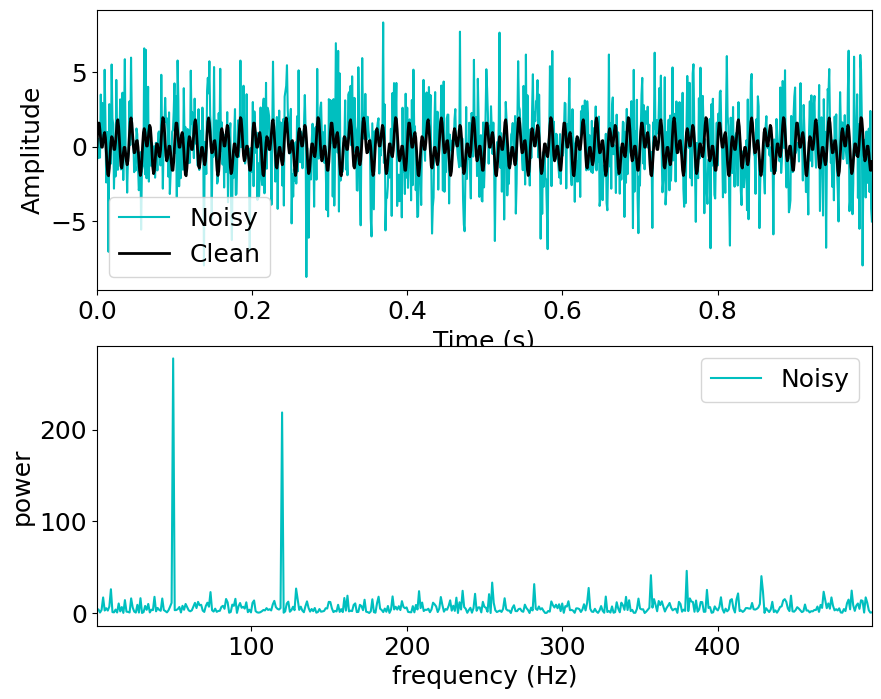

In [31]:
n = len(t)
fhat = np.fft.fft(f, n) #computing FFT
PSD = fhat *np.conj(fhat) / n #power spectrum
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype = 'int')

fig, axs = plt.subplots(2,1)
plt.sca(axs[0])
plt.plot(t, f, color = 'c', linewidth = 1.5, label = 'Noisy')
plt.plot(t, f_clean, color = 'k', linewidth = 2, label = 'Clean')
plt.xlim(t[0], t[-1])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color = 'c', linewidth = 1.5, label = 'Noisy')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()
#plt.title('Power Spectral Density vs Frequency')
plt.xlabel('frequency (Hz)')
plt.ylabel('power')

plt.show()

In [33]:
indeces = PSD > 100
PSDclean = PSD * indeces
fhat = indeces * fhat
ffilt = np.fft.ifft(fhat)

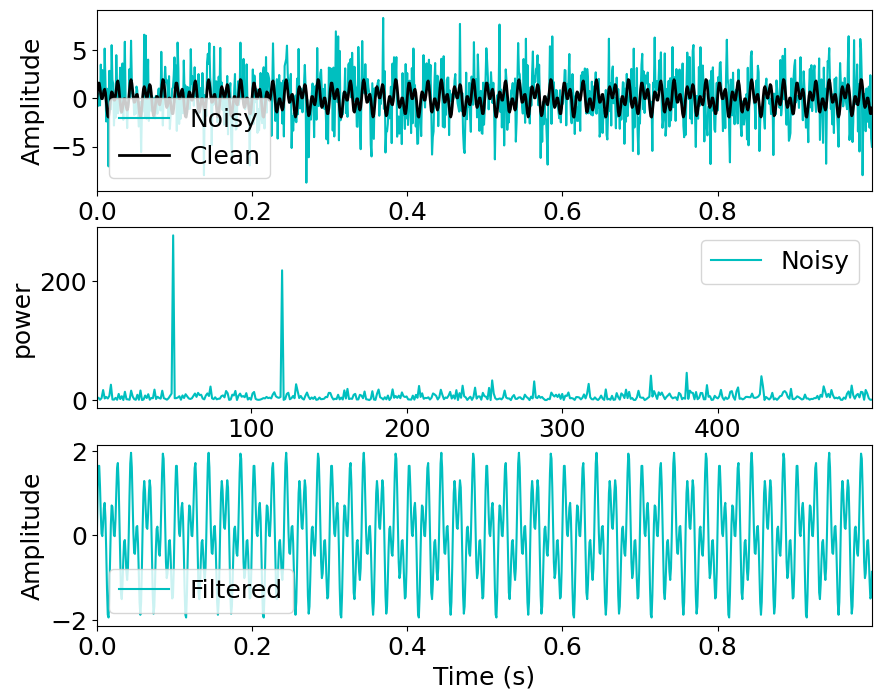

In [35]:
#let's plot everything together
fig, axs = plt.subplots(3,1)
plt.sca(axs[0])
plt.plot(t, f, color = 'c', linewidth = 1.5, label = 'Noisy')
plt.plot(t, f_clean, color = 'k', linewidth = 2, label = 'Clean')
plt.xlim(t[0], t[-1])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color = 'c', linewidth = 1.5, label = 'Noisy')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()
#plt.title('Power Spectral Density vs Frequency')
plt.xlabel('frequency (Hz)')
plt.ylabel('power')

plt.sca(axs[2])
plt.plot(t, ffilt, color = 'c', linewidth = 1.5, label = 'Filtered')
plt.xlim(t[0], t[-1])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()